# 🪄 image_classifier/prediction

In [1]:
import torch
import time
from torchvision import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from bluer_options import string
from bluer_objects import objects, file
from bluer_objects import storage
from bluer_sandbox import notebooks

from bluer_algo.host import signature
from bluer_algo import env
from bluer_algo.image_classifier.model.predictor import ImageClassifierPredictor
from bluer_algo.image_classifier.dataset.dataset import ImageClassifierDataset
from bluer_algo.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

/Users/kamangir/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
🪄  bluer_algo-4.165.1.bluer_ai-12.208.1.bluer_objects-6.218.1.bluer_options-5.144.1.torch-2.2.2.Python 3.12.9.Darwin 23.6.0..Jupyter-Notebook,
built on 02 July 2025, 12:11:09


In [2]:
prediction_object_name = objects.unique_object("image_classifier-prediction")

🌀  📂 image_classifier-prediction-2025-07-02-12-11-09-3g6tmb


---

🪄  loading ImageClassifierDataset from fruits-365-dataset-2025-07-01-gn9up7 ...
🌀  loaded 99 row(s) of Unnamed: 0, filename, class_index, subset from /Users/kamangir/storage/abcli/fruits-365-dataset-2025-07-01-gn9up7/metadata.csv


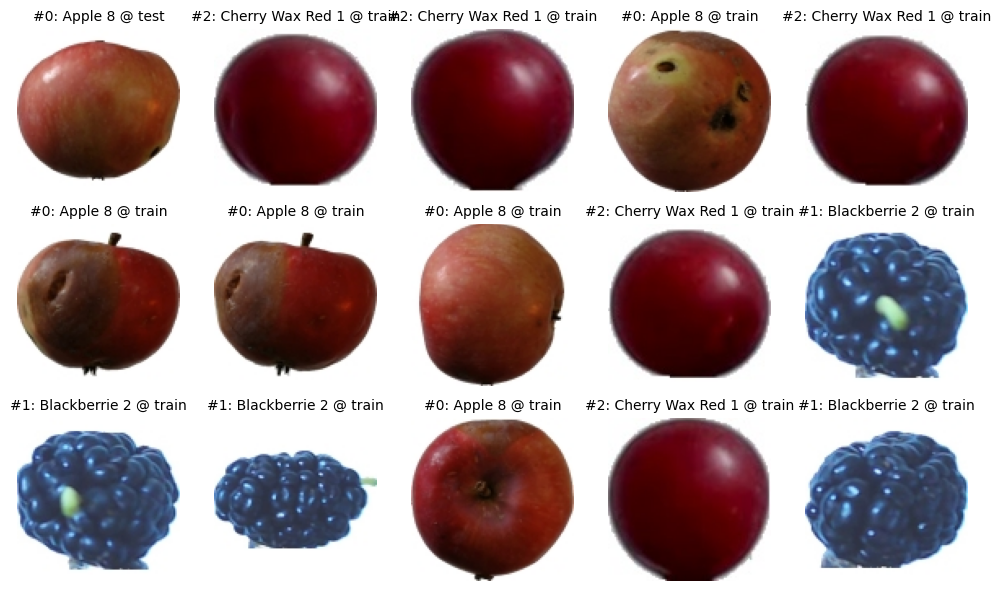

🌀  -> /Users/kamangir/storage/abcli/fruits-365-dataset-2025-07-01-gn9up7/grid.png
🪄  3 subset(s): train: 83 [%83.8], test: 5 [%5.1], eval: 11 [%11.1]
🪄  3 class(es): Apple 8: 33 [%33.3], Blackberrie 2: 33 [%33.3], Cherry Wax Red 1: 33 [%33.3]
🪄  shape: 100x100x3


In [3]:
dataset_object_name = env.BLUER_ALGO_FRUITS_360_TEST_DATASET
# assert storage.download(dataset_object_name)

success, dataset = ImageClassifierDataset.load(object_name=dataset_object_name)

success, class_index, image = dataset.sample(subset="test")
assert success

---

In [4]:
model_object_name = env.BLUER_ALGO_FRUITS_360_TEST_MODEL
# assert storage.download(model_object_name)

success, predictor = ImageClassifierPredictor.load(model_object_name)
assert success

🪄  loading ImageClassifierPredictor from fruits-365-model-2025-07-02-fvfomt ...
🪄  3 class(es): #0: Apple 8, #1: Blackberrie 2, #2: Cherry Wax Red 1


---

In [5]:
success, predicted_class, prediction_metadata = predictor.predict(
    image=image, 
    class_index=class_index, 
    object_name=prediction_object_name,
    log=True)

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
🪄  prediction: Apple 8 [#0]  (correct) - took 034 ms


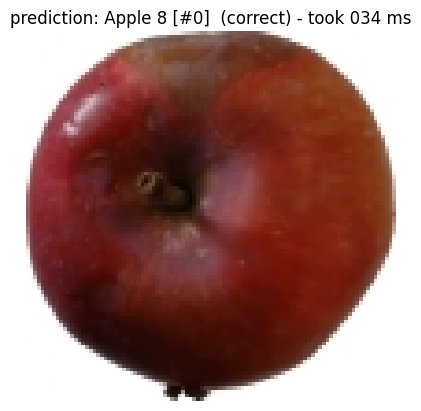

In [6]:
plt.imshow(image)
plt.title("prediction: {} [#{}] {}- took {}".format(
    dataset.dict_of_classes[predicted_class],
    predicted_class,
    " (correct) " if class_index == predicted_class else 
    "<> {} [#{}] ".format(
        dataset.dict_of_classes[class_index],
        class_index,
    ),
    string.pretty_duration(
        prediction_metadata["elapsed_time"], 
        include_ms=True,
        short=True,
        ),
))
plt.axis("off")

assert file.save_fig(
    objects.path_of(
        object_name=prediction_object_name,
        filename="prediction.png",
    )
)

---

In [7]:
assert notebooks.upload(prediction_object_name)

100%|██████████| 2/2 [00:01<00:00,  1.28it/s]
🌀  ⏺️  image_classifier-prediction-2025-07-02-12-11-09-3g6tmb | 00001
🌀  ⬆️  /Users/kamangir/storage/abcli/image_classifier-prediction-2025-07-02-12-11-09-3g6tmb/prediction.png
🌀  ⏹️  image_classifier-prediction-2025-07-02-12-11-09-3g6tmb


In [8]:
# END